Voy a analizar si quiza haya alguna relacion (aka mas chances de ganar la stage)
cuando los account y opportunity owner matchean.

Text(0.5, 1.0, 'Won Rate')

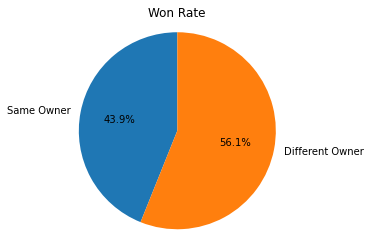

In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Entrenamieto_ECI_2020.csv')
data.drop_duplicates('Opportunity_ID', inplace=True) #Los owners se mantienen entre oportunidades asi que dropeo las repetidas
data = data[data['Stage'].isin(['Closed Won', 'Closed Lost'])]
data.replace(['Closed Won', 'Closed Lost'], [1, 0], inplace=True)

data = data[['Account_Owner', 'Opportunity_Owner', 'Stage']]

sameOwners = data[data['Account_Owner'] == data['Opportunity_Owner']]

diffOwners = data[data['Account_Owner'] != data['Opportunity_Owner']]

owners = pd.DataFrame(columns=['Won Rate'])
owners['Won Rate'] = (sameOwners['Stage'].mean(), diffOwners['Stage'].mean())
owners.rename(index={0:'Same Owner', 1:'Different Owner'}, inplace=True)
owners = owners.reset_index().rename(columns={'index':''})

fig1, ax1 = plt.subplots()
ax1.pie(owners['Won Rate'], labels=owners[''], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Won Rate')

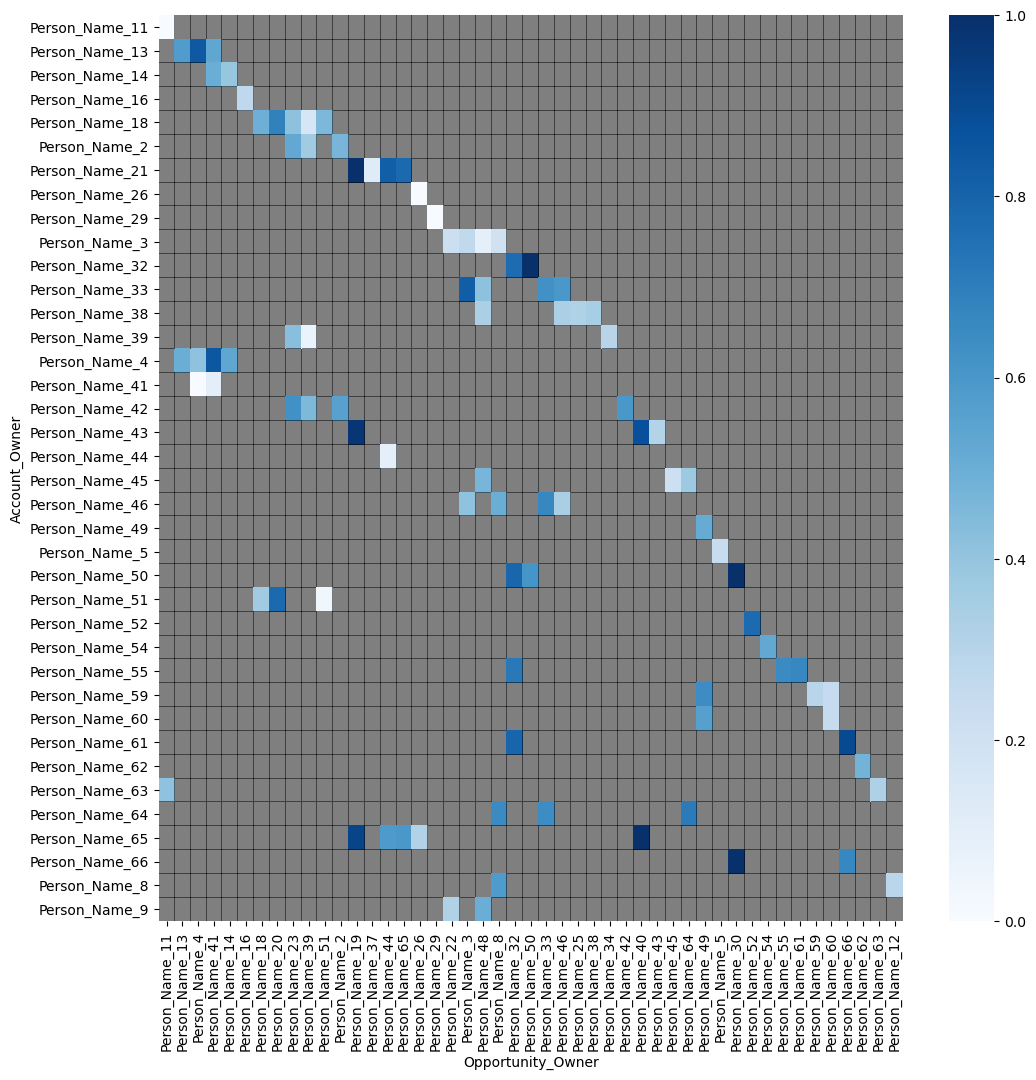

In [132]:
oppVsAccOwner = data.groupby(['Account_Owner', 'Opportunity_Owner']).agg({'Stage':['mean', 'count']})
oppVsAccOwner = oppVsAccOwner[oppVsAccOwner[('Stage', 'count')] > 5]
oppVsAccOwner = oppVsAccOwner.unstack()
oppVsAccOwner = oppVsAccOwner[('Stage', 'mean')]

colores = plt.get_cmap("Blues")
colores.set_bad(color='black', alpha=0.5)
fig = plt.figure(num=None, figsize=(12, 12), dpi = 100)
sns.heatmap(data=oppVsAccOwner, cmap=colores)